# Agragacion de datos por categoria

* Crear un DataFrame dummy
* Crear grupos sengun los datos de las filas
    > `doubleGroup = data.groupby(['Col Name1, Col Name2'])`
* Realizar operaciones de agregacion a los datos 'groupby'

        Realizamos 3 operacoines por cada uno de los grupos    
    > `doubleGroup.aggregate([np.sum, np.mean, np.std])` 
    
        Realizamos una operacion propia a cada uno de los grupos
    > `doubleGroup.aggregate([lambda x: np.mean(x) / np.std(x)])`
    
        Crear un grupo con alguna funcion aplicada
    > ```[Python]
    doubleGroup.aggregate(
        {
          'Income' : np.sum,
          'Age' : np.mean,
          'Height' : np.std
       }
    )
      ```

* Aplicar operaciones directamente al grupo
    > ```[Python]
        doubleGroup.describe()
        doubleGroup.mean()
        doubleGroup.sum()
      ```        
      
* Dividir conjuntos de entrenamiento y de testing
    * Usando la distribucion normal
    * Usando la libreria sklearn
    * Usando la funcion shuffle()

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [3]:
n = 500
genderData = []
incomeData = []

for i in range(0,500):
    # Elegimos aleatoriamente un valor del array 'gender'
    genderData.append(np.random.choice(gender))
    incomeData.append(np.random.choice(income))

In [4]:
# Distribucion uniforme normal: N(m[media], s[desviacion tipica]) 
# z -> (0,1)
# -> m + s * z[distribucion de numeros aleatorios de una normal]

# Altura base de 160 + dispersion de 30 * distribucion uniforme normal de n
height = np.round(160 + 30 * np.random.randn(n),2)
weigth = np.round(65 + 25 * np.random.randn(n),2)
age = list(map(int,30 + 12 * np.random.randn(n)))
income = np.round(18000 + 3500 * np.random.randn(n), 2)

In [5]:
data = pd.DataFrame(
    {
        'Gender' : genderData,
        'Economic Status' : incomeData,
        'Height' : height,
        'Weight' : weigth,
        'Age' : age,
        'Income' : income
    }

)

In [6]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,162.53,43.98,49,17663.47
1,Male,Rich,112.93,100.44,19,17903.67
2,Female,Rich,171.27,78.45,42,24775.21
3,Female,Poor,134.41,82.15,30,17365.95
4,Female,Middle Class,170.23,73.55,22,21764.86


## Agrupacion de Datos

In [7]:
'''La funcion groupby() no divide o separa los datos en diferentes grupos. Lo que hace es
crear un objeto del tipo groupby, que tendra dos atributos, uno sera el nombre y el otro 
sera el grupo. A estos atributos, se puede acceder utilizando la sintaxis tipica de puntos'''

groupedGender = data.groupby('Gender')

In [8]:
groupedGender.groups

{'Female': Int64Index([  2,   3,   4,   5,   7,   9,  10,  11,  12,  13,
             ...
             482, 484, 485, 486, 487, 489, 491, 494, 495, 496],
            dtype='int64', length=235),
 'Male': Int64Index([  0,   1,   6,   8,  14,  16,  18,  19,  20,  22,
             ...
             480, 481, 483, 488, 490, 492, 493, 497, 498, 499],
            dtype='int64', length=265)}

In [9]:
# Recorrera el grupo, que ya esta organizado

for names, groups in groupedGender:
    print(names)
    print(groups)

Female
     Gender Economic Status  Height  Weight  Age    Income
2    Female            Rich  171.27   78.45   42  24775.21
3    Female            Poor  134.41   82.15   30  17365.95
4    Female    Middle Class  170.23   73.55   22  21764.86
5    Female            Poor  158.40   49.76   25  18073.93
7    Female            Poor  142.59   94.97   46  16605.11
9    Female    Middle Class  143.84   84.03   32  18911.99
10   Female            Rich  163.18   63.55   20  14141.34
11   Female            Poor  148.06   74.58   24  16783.04
12   Female            Rich  117.49   78.85   36  13048.35
13   Female            Rich  175.70   73.49   43  19894.68
15   Female            Rich  196.68   65.60   48  17270.37
17   Female            Rich  123.50   53.52   28  16299.80
21   Female            Rich  152.44   52.28   39  18677.37
28   Female            Rich  158.45   30.54   35  18787.92
29   Female            Rich  161.87   63.68   46  22990.93
30   Female            Rich  158.91  130.43   29 

In [10]:
# Seleccionar un determinado grupo

groupedGender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Rich,171.27,78.45,42,24775.21
3,Female,Poor,134.41,82.15,30,17365.95
4,Female,Middle Class,170.23,73.55,22,21764.86
5,Female,Poor,158.40,49.76,25,18073.93
7,Female,Poor,142.59,94.97,46,16605.11
9,Female,Middle Class,143.84,84.03,32,18911.99
10,Female,Rich,163.18,63.55,20,14141.34
11,Female,Poor,148.06,74.58,24,16783.04
12,Female,Rich,117.49,78.85,36,13048.35
13,Female,Rich,175.70,73.49,43,19894.68


In [11]:
# Para cada genero se creara un grupo para cada posible 'Economic Status'
# Por lo tanto, se crearan 6 grupos

doubleGroup = data.groupby(['Gender', 'Economic Status'])

In [12]:
for names, groups in doubleGroup:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status  Height  Weight  Age    Income
4    Female    Middle Class  170.23   73.55   22  21764.86
9    Female    Middle Class  143.84   84.03   32  18911.99
36   Female    Middle Class  168.84   72.64   36  12395.20
59   Female    Middle Class  162.56   63.13   28  16796.85
70   Female    Middle Class  177.49   83.47    5  18827.13
72   Female    Middle Class  171.39   53.06   31  14577.92
73   Female    Middle Class  130.94   96.45   15  19752.34
78   Female    Middle Class  143.75   75.92   53  17076.99
86   Female    Middle Class   84.26   75.76   32  20763.66
88   Female    Middle Class  126.06   62.59   23  22047.53
90   Female    Middle Class  157.27   38.57   39  16032.46
92   Female    Middle Class  240.96   88.90   22  22552.97
101  Female    Middle Class  146.36   77.29   -7  17583.84
109  Female    Middle Class  142.90   54.28   21  14340.27
125  Female    Middle Class  187.44   31.92   35  22651.89
141  Female    Middle Class  

## Operaciones sobre datos agrupados

In [13]:
doubleGroup.sum()

Height   Weight   Age      Income
Gender Economic Status                                     
Female Middle Class     10343.35  4335.53  1994  1206979.59
       Poor             12890.78  5394.07  2427  1410671.10
       Rich             13279.36  5602.17  2700  1570180.88
Male   Middle Class     12162.51  5543.26  2298  1400814.94
       Poor             14312.36  5557.51  2624  1614263.54
       Rich             15627.28  6304.76  2851  1763418.27

In [14]:
doubleGroup.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     152.108088  63.757794  29.323529  17749.699853
       Poor             161.134750  67.425875  30.337500  17633.388750
       Rich             152.636322  64.392759  31.034483  18048.056092
Male   Middle Class     157.954675  71.990390  29.844156  18192.401818
       Poor             159.026222  61.750111  29.155556  17936.261556
       Rich             159.462041  64.334286  29.091837  17994.063980

In [15]:
doubleGroup.size()

Gender  Economic Status
Female  Middle Class       68
        Poor               80
        Rich               87
Male    Middle Class       77
        Poor               90
        Rich               98
dtype: int64

In [16]:
doubleGroup.describe()

Age                                               \
                       count       mean        std  min   25%   50%   75%   
Gender Economic Status                                                      
Female Middle Class     68.0  29.323529  12.415014 -7.0  23.0  31.5  36.0   
       Poor             80.0  30.337500  11.538536  2.0  23.0  29.0  41.0   
       Rich             87.0  31.034483  11.906075  8.0  22.0  29.0  39.0   
Male   Middle Class     77.0  29.844156  11.372942  2.0  20.0  32.0  38.0   
       Poor             90.0  29.155556  11.892695 -5.0  21.0  29.5  37.0   
       Rich             98.0  29.091837  12.303789 -5.0  20.0  28.5  37.0   

                             Height               ...        Income            \
                         max  count        mean   ...           75%       max   
Gender Economic Status                            ...                           
Female Middle Class     57.0   68.0  152.108088   ...    19990.3225  23349.68   
       Poor             54.0   80.0  161.134750   ...    20172.5800  24226.67   
       Rich             71.0   87.0  152.636322   ...    19846.5200  25031.68   
Male   Middle Class     48.0   77.0  157.954675   ...    20151.7100  25354.08   
       Poor             55.0   90.0  159.026222   ...    20661.3475  25268.03   
       Rich             53.0   98.0  159.462041   ...    20001.6350  27479.10   

                       Weight                                                \
                        count       mean        std    min      25%     50%   
Gender Economic Status                                                        
Female Middle Class      68.0  63.757794  26.658844   2.12  47.8450  67.365   
       Poor              80.0  67.425875  28.048860  -9.18  49.4225  69.875   
       Rich              87.0  64.392759  24.776771   6.91  49.8700  66.620   
Male   Middle Class      77.0  71.990390  22.927817  16.91  58.2000  71.590   
       Poor              90.0  61.750111  25.043418  11.79  44.0450  57.740   
       Rich              98.0  64.334286  24.330032  17.81  44.1725  65.775   

                                         
                            75%     max  
Gender Economic Status                   
Female Middle Class     80.6925  146.40  
       Poor             87.4550  139.50  
       Rich             78.6500  130.68  
Male   Middle Class     87.3600  135.94  
       Poor             76.2925  136.35  
       Rich             80.5250  118.78  

[6 rows x 32 columns]

In [17]:
groupedIncome = doubleGroup['Income']

In [18]:
groupedIncome.describe()

count          mean          std       min  \
Gender Economic Status                                               
Female Middle Class      68.0  17749.699853  3127.499782   9065.28   
       Poor              80.0  17633.388750  3114.362658  10182.41   
       Rich              87.0  18048.056092  3189.106675   9345.17   
Male   Middle Class      77.0  18192.401818  3014.502605  11147.51   
       Poor              90.0  17936.261556  3285.003634  10370.13   
       Rich              98.0  17994.063980  3116.854413   8280.01   

                               25%        50%         75%       max  
Gender Economic Status                                               
Female Middle Class     15718.9600  17519.345  19990.3225  23349.68  
       Poor             15666.3825  17849.750  20172.5800  24226.67  
       Rich             15997.4950  18287.870  19846.5200  25031.68  
Male   Middle Class     16601.1800  17992.960  20151.7100  25354.08  
       Poor             15601.5100  17785.690  20661.3475  25268.03  
       Rich             16148.9400  17758.530  20001.6350  27479.10

In [19]:
''' Podemos obtener el resultado de una agrupacion y, ademas, procesarla mediante algun tipo de
calculo. Como en el ejemplo, mostramos la suma de todos los ingresos en cada categoria,
mostramos la media de la edad por cada categoria y mostramos la desviacion estandard de cada 
categoria para la altura'''

doubleGroup.aggregate(
    {
        'Income' : np.sum,
        'Age' : np.mean,
        'Height' : np.std
    }
)

Income        Age     Height
Gender Economic Status                                  
Female Middle Class     1206979.59  29.323529  33.345954
       Poor             1410671.10  30.337500  31.239499
       Rich             1570180.88  31.034483  30.842833
Male   Middle Class     1400814.94  29.844156  30.555283
       Poor             1614263.54  29.155556  30.555448
       Rich             1763418.27  29.091837  26.504639

In [20]:
doubleGroup.aggregate(
    {
        'Age' : np.mean,
        'Height' : lambda height:np.mean(height)/np.std(height) #Promedio de las alturas / dev. tipica
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.323529  4.595431
       Poor             30.337500  5.190588
       Rich             31.034483  4.977532
Male   Middle Class     29.844156  5.203370
       Poor             29.155556  5.233670
       Rich             29.091837  6.047315

In [21]:
# Aplicar un mismo calculo a todos los grupos

doubleGroup.aggregate([np.sum, np.mean, np.std])

Height                          Weight             \
                             sum        mean        std      sum       mean   
Gender Economic Status                                                        
Female Middle Class     10343.35  152.108088  33.345954  4335.53  63.757794   
       Poor             12890.78  161.134750  31.239499  5394.07  67.425875   
       Rich             13279.36  152.636322  30.842833  5602.17  64.392759   
Male   Middle Class     12162.51  157.954675  30.555283  5543.26  71.990390   
       Poor             14312.36  159.026222  30.555448  5557.51  61.750111   
       Rich             15627.28  159.462041  26.504639  6304.76  64.334286   

                                    Age                            Income  \
                              std   sum       mean        std         sum   
Gender Economic Status                                                      
Female Middle Class     26.658844  1994  29.323529  12.415014  1206979.59   
       Poor             28.048860  2427  30.337500  11.538536  1410671.10   
       Rich             24.776771  2700  31.034483  11.906075  1570180.88   
Male   Middle Class     22.927817  2298  29.844156  11.372942  1400814.94   
       Poor             25.043418  2624  29.155556  11.892695  1614263.54   
       Rich             24.330032  2851  29.091837  12.303789  1763418.27   

                                                   
                                mean          std  
Gender Economic Status                             
Female Middle Class     17749.699853  3127.499782  
       Poor             17633.388750  3114.362658  
       Rich             18048.056092  3189.106675  
Male   Middle Class     18192.401818  3014.502605  
       Poor             17936.261556  3285.003634  
       Rich             17994.063980  3116.854413

In [22]:
# Realizar una operacion matematica 'propi' a todos los elementos

doubleGroup.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     4.595431  2.409401  2.379502  5.717561
       Poor             5.190588  2.419039  2.645821  5.697680
       Rich             4.977532  2.613983  2.621720  5.692090
Male   Middle Class     5.203370  3.160461  2.641344  6.074534
       Poor             5.233670  2.479536  2.465286  5.490632
       Rich             6.047315  2.657829  2.376618  5.802831

## Filtrado de datos

In [23]:
# Se muestran los ELEMENTOS de la agrupacion la suma de la cual supere los 2100
doubleGroup['Age'].filter(lambda x: x.sum() > 2100)

0      49
1      19
2      42
3      30
5      25
6      49
7      46
8      44
10     20
11     24
12     36
13     43
14     31
15     48
16     27
17     28
18     38
19     23
20     38
21     39
22     37
23     29
24     39
25     28
26     26
27     33
28     35
29     46
30     29
31     53
       ..
466    20
467    15
468    32
469    22
470    20
471    17
472    14
473    14
474    20
475    25
476    19
477    41
478    22
479    28
480    46
481    40
482    24
483    27
485    17
488    10
489     2
490    13
491     9
492    32
493     9
494    43
495    24
497    31
498    28
499    27
Name: Age, Length: 432, dtype: int64

## Transformacion de variables

In [24]:
# transform() realiza una operacion a una columna numerica

zscore = lambda x: (x - x.mean())/x.std()

In [25]:
zGroup = doubleGroup.transform(zscore)

In [26]:
import matplotlib.pyplot as plt


(array([  7.,  19.,  49.,  98., 109., 109.,  84.,  21.,   3.,   1.]),
 array([-2.92577434, -2.29752358, -1.66927281, -1.04102204, -0.41277127,
         0.21547949,  0.84373026,  1.47198103,  2.10023179,  2.72848256,
         3.35673333]),
 <a list of 10 Patch objects>)

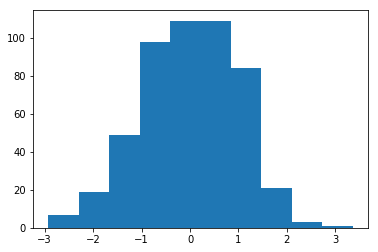

In [27]:
plt.hist(zGroup['Age'])

In [28]:
# En el caso que hubiera valoras vacios se rellenarian con el promedio

fillNaMean = lambda x: x.fillna(x.mean())
doubleGroup.transform(fillNaMean)

,Height,Weight,Age,Income
0,162.53,43.98,49,17663.47
1,112.93,100.44,19,17903.67
2,171.27,78.45,42,24775.21
3,134.41,82.15,30,17365.95
4,170.23,73.55,22,21764.86
5,158.40,49.76,25,18073.93
6,150.15,108.17,49,14643.53
7,142.59,94.97,46,16605.11
8,196.76,80.58,44,19399.24
9,143.84,84.03,32,18911.99


## Operaciones diversas muy utiles

In [29]:
# Podemos obtener la primera/la ultima ocurrencia de cada grupo

doubleGroup.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,162.53,43.98,49,17663.47
2,Female,Rich,171.27,78.45,42,24775.21
3,Female,Poor,134.41,82.15,30,17365.95
4,Female,Middle Class,170.23,73.55,22,21764.86
6,Male,Poor,150.15,108.17,49,14643.53
18,Male,Middle Class,190.78,38.93,38,15739.47


In [30]:
doubleGroup.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
491,Female,Poor,161.73,54.03,9,21243.13
495,Female,Rich,181.66,26.33,24,16913.50
496,Female,Middle Class,189.98,67.42,34,22562.34
497,Male,Rich,156.40,33.93,31,17791.10
498,Male,Middle Class,98.98,116.40,28,14291.46
499,Male,Poor,149.91,42.29,27,18572.12


In [31]:
# De los 6 grupos, obtenemos el elemento 32

doubleGroup.nth(32)

Age  Height    Income  Weight
Gender Economic Status                               
Female Middle Class      31  138.72  19950.31   89.75
       Poor              29  163.86  20867.19   67.55
       Rich              36  143.39  19411.75   71.23
Male   Middle Class      44  162.98  19514.64   30.62
       Poor              24  179.33  20155.62   34.63
       Rich              20  196.68  20331.37   45.99

In [32]:
# Ordenar la tabla eligiendo la columna. Si hay empate en la edad, se le da prioridad a los ingresos

dataSorted = data.sort_values(['Age', 'Income'])
dataSorted

,Gender,Economic Status,Height,Weight,Age,Income
101,Female,Middle Class,146.36,77.29,-7,17583.84
218,Male,Rich,106.19,59.14,-5,16916.59
444,Male,Poor,217.32,44.84,-5,17043.87
60,Male,Rich,146.14,35.43,-4,21685.50
183,Male,Middle Class,106.92,68.23,2,15538.96
174,Female,Middle Class,172.75,58.48,2,17279.37
489,Female,Poor,180.38,96.66,2,17389.09
107,Female,Poor,208.61,71.48,3,20269.60
436,Female,Middle Class,171.46,61.80,4,17752.18
304,Female,Poor,154.84,78.91,4,21597.24


In [33]:
ageGrouped = dataSorted.groupby('Gender')

In [34]:
ageGrouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
101,Female,Middle Class,146.36,77.29,-7,17583.84
218,Male,Rich,106.19,59.14,-5,16916.59


# Conjunto de entrenamiento y conjunto de testing

In [35]:
data = pd.read_csv('../../datasets/customer-churn-model/Customer Churn Model.txt')

In [36]:
len(data)

3333

In [37]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


#### Dividir utilizando la distribucion normal

In [80]:
a = np.random.randn(len(data))

(array([ 12.,  67., 220., 583., 877., 836., 520., 178.,  30.,  10.]),
 array([-3.38193685, -2.69302228, -2.0041077 , -1.31519312, -0.62627855,
         0.06263603,  0.7515506 ,  1.44046518,  2.12937975,  2.81829433,
         3.5072089 ]),
 <a list of 10 Patch objects>)

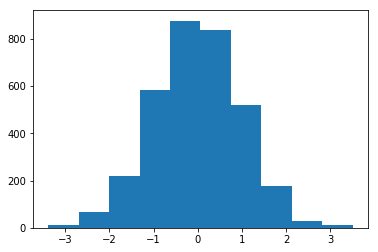

In [81]:
plt.hist(a)

(array([2.000e+00, 1.000e+00, 1.900e+01, 1.160e+02, 4.690e+02, 9.170e+02,
        1.055e+03, 5.540e+02, 1.790e+02, 2.100e+01]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <a list of 10 Patch objects>)

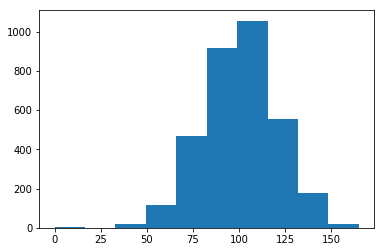

In [60]:
plt.hist(data['Day Calls'])

# a = np.random.randn(len(data['Day Calls']))

# plt.hist(a)

In [40]:
# Con esto dividimos los datos entre los que estan por debajo de 0.8 u 80% de probabilidad

check = ( a < 0.8)

In [41]:
check

array([ True,  True,  True, ...,  True, False,  True])

(array([ 692.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2641.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

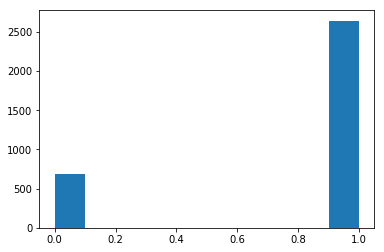

In [42]:
plt.hist(check)

In [43]:
# El 80%
training = data[check]

# El no 80%, osea el 20%
testing = data[~check]

In [44]:
len(testing)

692

In [45]:
len(training)

2641

#### Con la libreria sklearn

In [46]:
from sklearn.cross_validation import train_test_split

C:\Users\Marcos\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
# Obtenemos los datos divididos en entrenamiento y test
# test_size indica el % que queremos para el test, el resto se lo asigna a training

train, test = train_test_split(data, test_size = 0.2)

In [48]:
len(train)

2666

#### Usando una funcion de shuffle

In [49]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [50]:
import sklearn as sk

In [51]:
data = sk.utils.shuffle(data)

In [52]:
cutId = int(0.75*len(data))
trainData = data[:cutId]
testData = data[cutId:]


In [53]:
len(trainData)

2499

In [82]:
len(testData)

834